In [319]:
from pprint import pprint
import pandas as pd
import numpy as np

# standard library imports
import csv
import datetime as dt
import json
import os
import statistics
import time
import joblib

# customisations - ensure tables show all columns
pd.set_option("max_columns", 100)
pd.options.plotting.backend = "plotly"

In [2]:
#gamedf = pd.read_csv('data/download/clean_steam_game.csv')
#even though I read to csv from a pandas dataframe, when loading it in it doesn;t preserve file format so saved via joblib instead

In [3]:
gamedf = joblib.load('data/clean_game_data.joblib')


In [4]:
gamedf.head()

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,reviews,categories,genres,currency,init_price,final_price,discount_pct,windows,mac,linux,meta_score,achiev_total,rel_date
0,game,Counter-Strike,10,0,0,0,0,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Englishstrongstrong Frenchstrongstrong Germans...,[Valve],[Valve],0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],EUR,819.0,819.0,0.0,True,True,True,88,0,"1 Nov, 2000"
1,game,Team Fortress Classic,20,0,0,0,0,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,English French German Italian Spanish Spain Ko...,[Valve],[Valve],0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],EUR,399.0,399.0,0.0,True,True,True,0,0,"1 Apr, 1999"
2,game,Day of Defeat,30,0,0,0,0,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,English French German Italian Spanish Spain,[Valve],[Valve],0,0,"[Multi-player, Valve Anti-Cheat enabled]",[Action],EUR,399.0,399.0,0.0,True,True,True,79,0,"1 May, 2003"
3,game,Deathmatch Classic,40,0,0,0,0,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,English French German Italian Spanish Spain Ko...,[Valve],[Valve],0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],EUR,399.0,399.0,0.0,True,True,True,0,0,"1 Jun, 2001"
4,game,Half-Life: Opposing Force,50,0,0,0,0,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,English French German Korean,[Gearbox Software],[Valve],0,0,"[Single-player, Multi-player, Valve Anti-Cheat...",[Action],EUR,399.0,399.0,0.0,True,True,True,0,0,"1 Nov, 1999"


In [5]:
gamedf.categories.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Single-player]                                                                                                                                                                                               10892
[Single-player, Steam Achievements]                                                                                                                                                                            4104
[Single-player, Downloadable Content]                                                                                                                                                                          1953
[Single-player, Steam Achievements, Steam Cloud]                                                                                                                                                               1469
[Single-player, Partial Controller Support]                                                                                                             

<b>There are a lot of categories which mostly renote player modes - will need to define a way to group these</b>

Some of these, eg 'Steam Achievements' and 'Controller Support' can already be seen in other columns

Will crosscheck these to make sure they have been accounted for, eg if it says controller support is available then the controller support column should have a 1


In [8]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [26]:
to_1D(gamedf['categories']).value_counts()

Single-player                  55100
Steam Achievements             31207
Steam Cloud                    18122
Downloadable Content           17364
Multi-player                   15562
                               ...  
Un joueur                          1
Remote Play na TV                  1
Compat. manette : partielle        1
Sdílená/Rozdělená obrazovka        1
Sběratelské karty                  1
Length: 87, dtype: int64

In [72]:
cats = to_1D(gamedf['categories'])

In [73]:
print(cats.unique())

['Multi-player' 'PvP' 'Online PvP' 'Shared/Split Screen PvP'
 'Valve Anti-Cheat enabled' 'Remote Play Together' 'Single-player'
 'Steam Cloud' 'Remote Play on Phone' 'Remote Play on Tablet'
 'Steam Achievements' 'Steam Trading Cards' 'Captions available'
 'Partial Controller Support' 'Includes Source SDK'
 'Cross-Platform Multiplayer' 'Stats' 'Commentary available'
 'Includes level editor' 'Steam Workshop' 'In-App Purchases' 'Co-op'
 'Full controller support' 'Steam Leaderboards' 'Remote Play on TV'
 'Online Co-op' 'SteamVR Collectibles' 'Shared/Split Screen Co-op'
 'Shared/Split Screen' 'Downloadable Content' 'LAN PvP' 'LAN Co-op' 'MMO'
 'Un jugador' 'Multijugador' 'VR Support' 'Mods' 'Mods (require HL2)'
 'Steam Turn Notifications' 'Režim pro jednoho hráče'
 'Režim pro více hráčů' 'PvP na sdílené/rozdělené obrazovce' 'Kooperace'
 'Kooperace na sdílené/rozdělené obrazovce' 'Sdílená/Rozdělená obrazovka'
 'Achievementy' 'Plná podpora ovladače' 'Sběratelské karty' 'Statistiky'
 'Žebříčky

First I will crreate a dataframe where the rows stay the same but each value in categories is assigned to its own column with a 1/0 if it contains

In [74]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [75]:
cat_bool = boolean_df(gamedf['categories'], cats.unique())

In [76]:
cat_bool.head()

,Multi-player,PvP,Online PvP,Shared/Split Screen PvP,Valve Anti-Cheat enabled,Remote Play Together,Single-player,Steam Cloud,Remote Play on Phone,Remote Play on Tablet,Steam Achievements,Steam Trading Cards,Captions available,Partial Controller Support,Includes Source SDK,Cross-Platform Multiplayer,Stats,Commentary available,Includes level editor,Steam Workshop,In-App Purchases,Co-op,Full controller support,Steam Leaderboards,Remote Play on TV,Online Co-op,SteamVR Collectibles,Shared/Split Screen Co-op,Shared/Split Screen,Downloadable Content,LAN PvP,LAN Co-op,MMO,Un jugador,Multijugador,VR Support,Mods,Mods (require HL2),Steam Turn Notifications,Režim pro jednoho hráče,Režim pro více hráčů,PvP na sdílené/rozdělené obrazovce,Kooperace,Kooperace na sdílené/rozdělené obrazovce,Sdílená/Rozdělená obrazovka,Achievementy,Plná podpora ovladače,Sběratelské karty,Statistiky,Žebříčky služby Steam,Remote Play na telefonu,Remote Play na tabletu,Remote Play na TV,Un joueur,Succès Steam,Cartes à échanger Steam,Compat. manette : partielle,Remote Play sur téléphone,Remote Play sur tablette,Einzelspieler,Mehrspieler,Online-PvP,PvP-Spiele mit geteiltem Bildschirm,Koop,Online-Koop,Käufe im Spiel,Steam-Errungenschaften,Volle Controllerunterstützung,Steam-Sammelkarten,Remote Play auf Smartphones,Remote Play auf Tablets,Remote Play auf TV-Geräten,Logros de Steam,Compat. total con mando,Cromos de Steam,Remote Play en tableta,Remote Play en TV,Um jogador,Multijogador,Cooperativo,Cooperativo online,Conquistas Steam,Compras em aplicativo,Remote Play no celular,Remote Play no tablet,Giocatore singolo,Supporto completo per i controller
0,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

Summing up the boolean cats we can see there are a lot of categories with just 1 value but in different languages

In [77]:
cat_bool.select_dtypes(include=['bool']).sum(axis=0)

Multi-player                          15562
PvP                                    7571
Online PvP                             7363
Shared/Split Screen PvP                4077
Valve Anti-Cheat enabled                364
                                      ...  
Compras em aplicativo                     1
Remote Play no celular                    1
Remote Play no tablet                     1
Giocatore singolo                         1
Supporto completo per i controller        1
Length: 87, dtype: int64

In [88]:
cat_bool[cat_bool.columns[cat_bool.sum(axis=0)<5]] #52 columns with less than 5 - drop these

,Un jugador,Multijugador,Mods,Mods (require HL2),Režim pro jednoho hráče,Režim pro více hráčů,PvP na sdílené/rozdělené obrazovce,Kooperace,Kooperace na sdílené/rozdělené obrazovce,Sdílená/Rozdělená obrazovka,Achievementy,Plná podpora ovladače,Sběratelské karty,Statistiky,Žebříčky služby Steam,Remote Play na telefonu,Remote Play na tabletu,Remote Play na TV,Un joueur,Succès Steam,Cartes à échanger Steam,Compat. manette : partielle,Remote Play sur téléphone,Remote Play sur tablette,Einzelspieler,Mehrspieler,Online-PvP,PvP-Spiele mit geteiltem Bildschirm,Koop,Online-Koop,Käufe im Spiel,Steam-Errungenschaften,Volle Controllerunterstützung,Steam-Sammelkarten,Remote Play auf Smartphones,Remote Play auf Tablets,Remote Play auf TV-Geräten,Logros de Steam,Compat. total con mando,Cromos de Steam,Remote Play en tableta,Remote Play en TV,Um jogador,Multijogador,Cooperativo,Cooperativo online,Conquistas Steam,Compras em aplicativo,Remote Play no celular,Remote Play no tablet,Giocatore singolo,Supporto completo per i controller
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59650,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59652,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59653,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [89]:
cat_bool = cat_bool[cat_bool.columns[cat_bool.sum(axis=0)>5]] 

In [91]:
cat_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59655 entries, 0 to 59654
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Multi-player                59655 non-null  bool 
 1   PvP                         59655 non-null  bool 
 2   Online PvP                  59655 non-null  bool 
 3   Shared/Split Screen PvP     59655 non-null  bool 
 4   Valve Anti-Cheat enabled    59655 non-null  bool 
 5   Remote Play Together        59655 non-null  bool 
 6   Single-player               59655 non-null  bool 
 7   Steam Cloud                 59655 non-null  bool 
 8   Remote Play on Phone        59655 non-null  bool 
 9   Remote Play on Tablet       59655 non-null  bool 
 10  Steam Achievements          59655 non-null  bool 
 11  Steam Trading Cards         59655 non-null  bool 
 12  Captions available          59655 non-null  bool 
 13  Partial Controller Support  59655 non-null  bool 
 14  Includ

In [92]:
with np.printoptions(threshold=np.inf):
    print(cat_bool.columns)

Index(['Multi-player', 'PvP', 'Online PvP', 'Shared/Split Screen PvP',
       'Valve Anti-Cheat enabled', 'Remote Play Together', 'Single-player',
       'Steam Cloud', 'Remote Play on Phone', 'Remote Play on Tablet',
       'Steam Achievements', 'Steam Trading Cards', 'Captions available',
       'Partial Controller Support', 'Includes Source SDK',
       'Cross-Platform Multiplayer', 'Stats', 'Commentary available',
       'Includes level editor', 'Steam Workshop', 'In-App Purchases', 'Co-op',
       'Full controller support', 'Steam Leaderboards', 'Remote Play on TV',
       'Online Co-op', 'SteamVR Collectibles', 'Shared/Split Screen Co-op',
       'Shared/Split Screen', 'Downloadable Content', 'LAN PvP', 'LAN Co-op',
       'MMO', 'VR Support', 'Steam Turn Notifications'],
      dtype='object')


drop unneccesary columns

In [95]:
import matplotlib.pyplot as plt

In [104]:
cat_bool.columns

Index(['Multi-player', 'PvP', 'Online PvP', 'Shared/Split Screen PvP',
       'Valve Anti-Cheat enabled', 'Remote Play Together', 'Single-player',
       'Steam Cloud', 'Remote Play on Phone', 'Remote Play on Tablet',
       'Steam Achievements', 'Steam Trading Cards', 'Captions available',
       'Partial Controller Support', 'Includes Source SDK',
       'Cross-Platform Multiplayer', 'Stats', 'Commentary available',
       'Includes level editor', 'Steam Workshop', 'In-App Purchases', 'Co-op',
       'Full controller support', 'Steam Leaderboards', 'Remote Play on TV',
       'Online Co-op', 'SteamVR Collectibles', 'Shared/Split Screen Co-op',
       'Shared/Split Screen', 'Downloadable Content', 'LAN PvP', 'LAN Co-op',
       'MMO', 'VR Support', 'Steam Turn Notifications'],
      dtype='object')

In [105]:
fruits_freq = pd.DataFrame(np.dot(cat_bool.astype(int).T, cat_bool.astype(int)), columns = cat_bool.columns, index = cat_bool.columns)

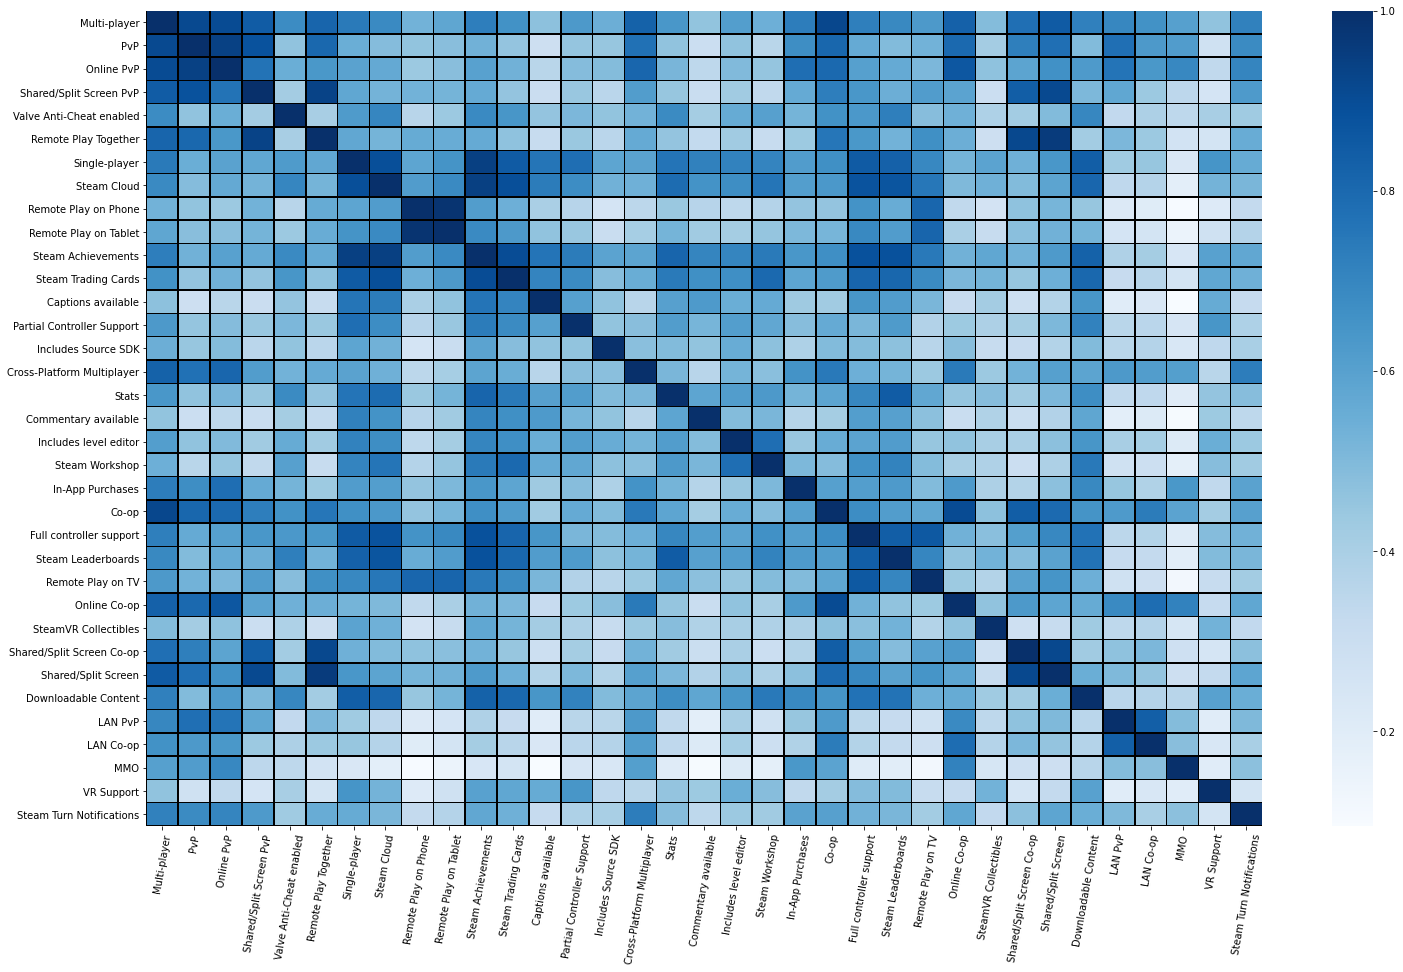

In [122]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (25,15))
sns.heatmap(fruits_freq.corr(), cmap = "Blues", linecolor = 'black', linewidths = 0.5)
plt.xticks(rotation=80)
plt.show()
#plt.savefig("heatmap.png", dpi = 300)

In [126]:
with np.printoptions(threshold=np.inf):
    print(cat_bool.select_dtypes(include=['bool']).sum(axis=0))

Multi-player                  15562
PvP                            7571
Online PvP                     7363
Shared/Split Screen PvP        4077
Valve Anti-Cheat enabled        364
Remote Play Together           4534
Single-player                 55102
Steam Cloud                   18122
Remote Play on Phone            794
Remote Play on Tablet          1042
Steam Achievements            31207
Steam Trading Cards           14578
Captions available             1327
Partial Controller Support    10297
Includes Source SDK              66
Cross-Platform Multiplayer     2356
Stats                          3712
Commentary available            255
Includes level editor          2187
Steam Workshop                 3239
In-App Purchases               2694
Co-op                          7298
Full controller support       14342
Steam Leaderboards             8090
Remote Play on TV              2058
Online Co-op                   3689
SteamVR Collectibles             42
Shared/Split Screen Co-op   

In [128]:
cat_bool.drop(columns = ['Steam Cloud', 'Steam Trading Cards', 'Captions available', 'Includes Source SDK',
             'Commentary available', 'Includes level editor', 'Steam Leaderboards', 'SteamVR Collectibles', 
              'Steam Turn Notifications', 'Stats'], inplace=True )

In [130]:
cat_bool.drop(columns = ['Steam Workshop', 'Valve Anti-Cheat enabled'], inplace=True )

In [131]:
with np.printoptions(threshold=np.inf):
    print(cat_bool.select_dtypes(include=['bool']).sum(axis=0))

Multi-player                  15562
PvP                            7571
Online PvP                     7363
Shared/Split Screen PvP        4077
Remote Play Together           4534
Single-player                 55102
Remote Play on Phone            794
Remote Play on Tablet          1042
Steam Achievements            31207
Partial Controller Support    10297
Cross-Platform Multiplayer     2356
In-App Purchases               2694
Co-op                          7298
Full controller support       14342
Remote Play on TV              2058
Online Co-op                   3689
Shared/Split Screen Co-op      2439
Shared/Split Screen            5101
Downloadable Content          17364
LAN PvP                         342
LAN Co-op                       287
MMO                            1153
VR Support                      400
dtype: int64


In [ ]:
Combine columns together

Multi-player = Cross-Platform Multiplayer, MMO, Shared/Split Screen,
PvP = Online PvP, Shared/Split Screen PvP, LAN PvP  
co-op = Online Co-op, Shared/Split Screen Co-op ,  LAN Co-op   
controller_sup = Partial Controller Support, Full controller support 
remote_play (this is also coop and multiplayer = Remote Play Together, Remote Play on Tablet, Remote Play on Phone,
             Remote Play on TV  

Steam Achievements            
In-App Purchases               
Downloadable Content                              
VR Support    

Co-op is a subcategory or game mode of Multiplayer. Multiplayer covers all games where you are more than one player. Co-op is short for cooperative and refers a multiplayer game where you play together with other players to complete a common goal against a non-player enemy.

In [132]:
cat_bool['Multi-player']=np.where(cat_bool['Multi-player'],cat_bool['Multi-player'],cat_bool['Cross-Platform Multiplayer'])


In [141]:
cat_bool['Multi-player']=np.where(cat_bool['Multi-player'],cat_bool['Multi-player'],cat_bool['MMO'])

In [143]:
cat_bool['PvP']=np.where(cat_bool['PvP'],cat_bool['PvP'],cat_bool['Online PvP'])
cat_bool['PvP']=np.where(cat_bool['PvP'],cat_bool['PvP'],cat_bool['Shared/Split Screen PvP'])
cat_bool['PvP']=np.where(cat_bool['PvP'],cat_bool['PvP'],cat_bool['LAN PvP'])
cat_bool['Co-op']=np.where(cat_bool['Co-op'],cat_bool['Co-op'],cat_bool['Online Co-op'])
cat_bool['Co-op']=np.where(cat_bool['Co-op'],cat_bool['Co-op'],cat_bool['Shared/Split Screen Co-op'])
cat_bool['Co-op']=np.where(cat_bool['Co-op'],cat_bool['Co-op'],cat_bool['LAN Co-op'])
cat_bool['Multi-player']=np.where(cat_bool['Multi-player'],cat_bool['Multi-player'],cat_bool['Shared/Split Screen'])
cat_bool['Partial Controller Support']=np.where(cat_bool['Partial Controller Support'],cat_bool['Partial Controller Support'],cat_bool['Full controller support'])
cat_bool['Remote Play Together']=np.where(cat_bool['Remote Play Together'],cat_bool['Remote Play Together'],cat_bool['Remote Play on Tablet'])
cat_bool['Remote Play Together']=np.where(cat_bool['Remote Play Together'],cat_bool['Remote Play Together'],cat_bool['Remote Play on Phone'])
cat_bool['Remote Play Together']=np.where(cat_bool['Remote Play Together'],cat_bool['Remote Play Together'],cat_bool['Remote Play on TV'])

In [146]:
cat_bool.drop(columns = ['Online PvP','Shared/Split Screen PvP', 'LAN PvP', 'Online Co-op',
                         'Shared/Split Screen Co-op', 'LAN Co-op', 'Shared/Split Screen','Full controller support',
                         'Remote Play on Tablet', 'Remote Play on Phone', 'Remote Play on TV'], inplace=True)

In [148]:
cat_bool.drop(columns = ['MMO', 'Cross-Platform Multiplayer'], inplace=True) 

In [149]:
cat_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59655 entries, 0 to 59654
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Multi-player                59655 non-null  bool 
 1   PvP                         59655 non-null  bool 
 2   Remote Play Together        59655 non-null  bool 
 3   Single-player               59655 non-null  bool 
 4   Steam Achievements          59655 non-null  bool 
 5   Partial Controller Support  59655 non-null  bool 
 6   In-App Purchases            59655 non-null  bool 
 7   Co-op                       59655 non-null  bool 
 8   Downloadable Content        59655 non-null  bool 
 9   VR Support                  59655 non-null  bool 
dtypes: bool(10)
memory usage: 582.7 KB


In [163]:
cat_bool.head()

,Multi-player,PvP,Remote Play Together,Single-player,Steam Achievements,Partial Controller Support,In-App Purchases,Co-op,Downloadable Content,VR Support
0,True,True,False,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False,False,False,False
4,True,False,True,True,False,False,False,False,False,False


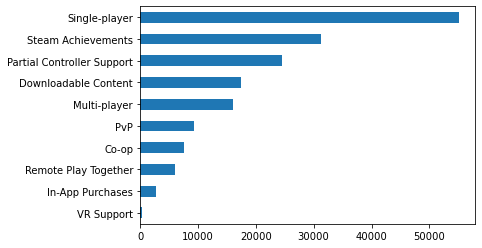

In [172]:
cat_bool.select_dtypes(include=['bool']).sum(axis=0).sort_values().plot(kind="barh", )
#plt.show()
plt.savefig("game_cats_plot.png", dpi = 300, bbox_inches = "tight")

In [152]:
gamedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59655 entries, 0 to 59654
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  59655 non-null  object 
 1   name                  59655 non-null  object 
 2   steam_appid           59655 non-null  int64  
 3   required_age          59655 non-null  int64  
 4   is_free               59655 non-null  int64  
 5   controller_support    59655 non-null  int64  
 6   dlc                   59655 non-null  object 
 7   detailed_description  59655 non-null  object 
 8   about_the_game        59655 non-null  object 
 9   short_description     59655 non-null  object 
 10  supported_languages   59655 non-null  object 
 11  developers            59655 non-null  object 
 12  publishers            59655 non-null  object 
 13  demos                 59655 non-null  int64  
 14  reviews               59655 non-null  object 
 15  categories         

In [159]:
gamedf = pd.concat([gamedf, cat_bool], axis=1)

In [160]:
gamedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59655 entries, 0 to 59654
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   type                        59655 non-null  object 
 1   name                        59655 non-null  object 
 2   steam_appid                 59655 non-null  int64  
 3   required_age                59655 non-null  int64  
 4   is_free                     59655 non-null  int64  
 5   controller_support          59655 non-null  int64  
 6   dlc                         59655 non-null  object 
 7   detailed_description        59655 non-null  object 
 8   about_the_game              59655 non-null  object 
 9   short_description           59655 non-null  object 
 10  supported_languages         59655 non-null  object 
 11  developers                  59655 non-null  object 
 12  publishers                  59655 non-null  object 
 13  demos                       596

<AxesSubplot:>

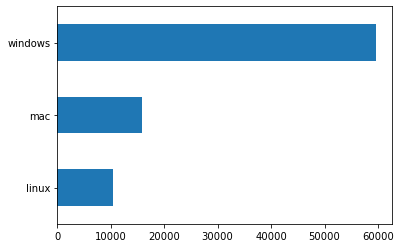

In [177]:
gamedf[['windows', 'linux', 'mac']].sum(axis=0).sort_values().plot(kind='barh')

In [188]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [194]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('windows', 'mac', 'linux'))
L= len(gamedf)

cnames = list(gamedf[['windows', 'mac', 'linux']])
for k, name in enumerate(cnames):
    n_true = gamedf[name].sum()
    fig.add_trace(go.Bar(x=['True'], y=[L-n_true], name=name ), 1,k+1)
    
fig.update_layout(barmode='relative',  bargap=0.05, width=700, height=400)

In [201]:
x = ['windows', 'mac', 'linux']
y = [gamedf['windows'].sum(), gamedf['mac'].sum(), gamedf['linux'].sum()]

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
    #marker_color=['#4169e1', '#4169e1', '#4169e1']
        )])
fig.update_layout(title_text='Operating Systems')
fig.show()

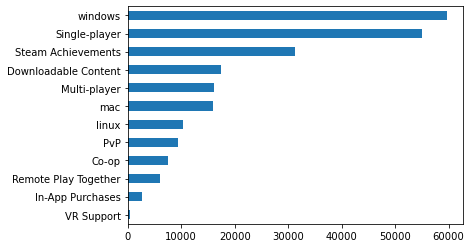

In [173]:
gamedf.select_dtypes(include=['bool']).sum(axis=0).sort_values().plot(kind="barh", )
#plt.show()
plt.savefig("game_dfcats_plot.png", dpi = 300, bbox_inches = "tight")

In [214]:
x = ['Single-player', 'Steam Achievements', 'Downloadable Content', 'Multi-player', 'PvP' ,'Co-op',
    'Remote Play Together', 'In-App Purchases', 'VR Support', 'controller_support']
y = [gamedf['Single-player'].sum(), gamedf['Steam Achievements'].sum(), gamedf['Downloadable Content'].sum(),
     gamedf['Multi-player'].sum(), gamedf['PvP'].sum() ,gamedf['Co-op'].sum(),
    gamedf['Remote Play Together'].sum(), gamedf['In-App Purchases'].sum(), 
     gamedf['VR Support'].sum(), gamedf['controller_support'].sum()]

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=y, y=x,
            text=y,
            textposition='auto', orientation='h'
    #marker_color=['#4169e1', '#4169e1', '#4169e1']
        )])
fig.update_layout(title_text='Player Modes', yaxis={'categoryorder':'total ascending'})
fig.show()

In [202]:
gamedf.select_dtypes(include=['bool']).sum(axis=0).sort_values()

VR Support                400
In-App Purchases         2694
Remote Play Together     6096
Co-op                    7564
PvP                      9374
linux                   10384
mac                     15899
Multi-player            16092
Downloadable Content    17364
Steam Achievements      31207
Single-player           55102
windows                 59649
dtype: int64

In [ ]:
gamedf['controller_support']=np.where(gamedf['controller_support'],gamedf['controller_support'],gamedf['Partial Controller Support'])

In [ ]:
gamedf.drop(columns = 'Partial Controller Support', inplace=True)

In [229]:
gens = to_1D(gamedf['genres'])

In [230]:
gens.value_counts()

Indie                    37172
Action                   25055
Casual                   20708
Adventure                19685
Simulation               13281
Strategy                 11601
RPG                      10288
Early Access              4728
Free to Play              4658
Sports                    3081
Racing                    2425
Massively Multiplayer     1814
Design & Illustration     1233
Web Publishing            1138
Violent                    733
Utilities                  475
Gore                       440
Animation & Modeling       349
Nudity                     287
Education                  273
Sexual Content             265
Software Training          229
Video Production           219
Game Development           196
Photo Editing              146
Audio Production           142
Accounting                   8
Movie                        3
Abenteuer                    1
Avventura                    1
Estratégia                   1
Episodic                     1
Aventura

In [231]:
gen_bool = boolean_df(gamedf['genres'], gens.unique())

In [233]:
gen_bool.head()

,Action,Free to Play,Strategy,Adventure,Indie,RPG,Animation & Modeling,Video Production,Casual,Simulation,Racing,Massively Multiplayer,Nudity,Violent,Sports,Early Access,Design & Illustration,Education,Photo Editing,Utilities,Game Development,Gore,Web Publishing,Software Training,Audio Production,Sexual Content,Nezávislé,Movie,Accounting,Abenteuer,Gelegenheitsspiele,Acción,Aventura,Estratégia,Avventura,Free-to-Play,Documentary,Episodic,Short,Tutorial,360 Video
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [237]:
gen_bool[gen_bool.columns[gen_bool.sum(axis=0)<5]].head() #14 columns with less than 14 in genre

,Nezávislé,Movie,Abenteuer,Gelegenheitsspiele,Acción,Aventura,Estratégia,Avventura,Free-to-Play,Documentary,Episodic,Short,Tutorial,360 Video
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [238]:
gen_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59655 entries, 0 to 59654
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Action                 59655 non-null  bool 
 1   Free to Play           59655 non-null  bool 
 2   Strategy               59655 non-null  bool 
 3   Adventure              59655 non-null  bool 
 4   Indie                  59655 non-null  bool 
 5   RPG                    59655 non-null  bool 
 6   Animation & Modeling   59655 non-null  bool 
 7   Video Production       59655 non-null  bool 
 8   Casual                 59655 non-null  bool 
 9   Simulation             59655 non-null  bool 
 10  Racing                 59655 non-null  bool 
 11  Massively Multiplayer  59655 non-null  bool 
 12  Nudity                 59655 non-null  bool 
 13  Violent                59655 non-null  bool 
 14  Sports                 59655 non-null  bool 
 15  Early Access           59655 non-nul

In [239]:
gen_bool = gen_bool[gen_bool.columns[gen_bool.sum(axis=0)>5]]

In [240]:
gen_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59655 entries, 0 to 59654
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Action                 59655 non-null  bool 
 1   Free to Play           59655 non-null  bool 
 2   Strategy               59655 non-null  bool 
 3   Adventure              59655 non-null  bool 
 4   Indie                  59655 non-null  bool 
 5   RPG                    59655 non-null  bool 
 6   Animation & Modeling   59655 non-null  bool 
 7   Video Production       59655 non-null  bool 
 8   Casual                 59655 non-null  bool 
 9   Simulation             59655 non-null  bool 
 10  Racing                 59655 non-null  bool 
 11  Massively Multiplayer  59655 non-null  bool 
 12  Nudity                 59655 non-null  bool 
 13  Violent                59655 non-null  bool 
 14  Sports                 59655 non-null  bool 
 15  Early Access           59655 non-nul

In [247]:
gen_clean = gen_bool[['Action', 'Free to Play', 'Strategy', 'Adventure','Indie', 'RPG', 'Casual','Simulation',
                     'Racing', 'Massively Multiplayer', 'Sports', 'Early Access']]

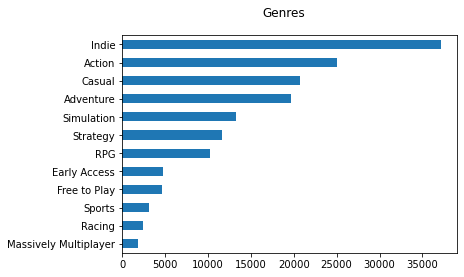

In [248]:
gen_clean.select_dtypes(include=['bool']).sum(axis=0).sort_values().plot(kind="barh")
plt.suptitle('Genres')
plt.show()
#plt.savefig("game_dfcats_plot.png", dpi = 300, bbox_inches = "tight")

In [351]:
fig = gen_clean.select_dtypes(include=['bool']).sum(axis=0).sort_values().plot(kind="barh", title='Total Game Genres')
fig.show()

In [158]:
with np.printoptions(threshold=np.inf):
    print(to_1D(gamedf['genres']).unique())

['Action' 'Free to Play' 'Strategy' 'Adventure' 'Indie' 'RPG'
 'Animation & Modeling' 'Video Production' 'Casual' 'Simulation' 'Racing'
 'Massively Multiplayer' 'Nudity' 'Violent' 'Sports' 'Early Access'
 'Design & Illustration' 'Education' 'Photo Editing' 'Utilities'
 'Game Development' 'Gore' 'Web Publishing' 'Software Training'
 'Audio Production' 'Sexual Content' 'Nezávislé' 'Movie' 'Accounting'
 'Abenteuer' 'Gelegenheitsspiele' 'Acción' 'Aventura' 'Estratégia'
 'Avventura' 'Free-to-Play' 'Documentary' 'Episodic' 'Short' 'Tutorial'
 '360 Video']


In [249]:
gamedf = pd.concat([gamedf, gen_clean], axis=1)

In [251]:
gen_cols = ['Action', 'Free to Play', 'Strategy', 'Adventure','Indie', 'RPG', 'Casual','Simulation',
                     'Racing', 'Massively Multiplayer', 'Sports', 'Early Access']

In [257]:
gamedf['tot_gen'] = gamedf[gen_cols].sum(axis=1)

In [258]:
gamedf.tot_gen.value_counts() #there are 1448 columns without wanted genres - get rid of these

2     16290
3     15811
1     12676
4      8043
5      3533
0      1448
6      1288
7       374
8       138
9        32
10       11
11       10
12        1
Name: tot_gen, dtype: int64

In [259]:
gamedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59655 entries, 0 to 59654
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   59655 non-null  object 
 1   name                   59655 non-null  object 
 2   steam_appid            59655 non-null  int64  
 3   required_age           59655 non-null  int64  
 4   is_free                59655 non-null  int64  
 5   controller_support     59655 non-null  int64  
 6   dlc                    59655 non-null  object 
 7   detailed_description   59655 non-null  object 
 8   about_the_game         59655 non-null  object 
 9   short_description      59655 non-null  object 
 10  supported_languages    59655 non-null  object 
 11  developers             59655 non-null  object 
 12  publishers             59655 non-null  object 
 13  demos                  59655 non-null  int64  
 14  reviews                59655 non-null  object 
 15  ca

In [264]:
gen_drop = gamedf[gamedf['tot_gen'] == 0 ].index

In [266]:
gamedf.drop(gen_drop, inplace=True) 

In [268]:
gamedf.reset_index(drop=True, inplace=True)

In [269]:
gamedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58207 entries, 0 to 58206
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   58207 non-null  object 
 1   name                   58207 non-null  object 
 2   steam_appid            58207 non-null  int64  
 3   required_age           58207 non-null  int64  
 4   is_free                58207 non-null  int64  
 5   controller_support     58207 non-null  int64  
 6   dlc                    58207 non-null  object 
 7   detailed_description   58207 non-null  object 
 8   about_the_game         58207 non-null  object 
 9   short_description      58207 non-null  object 
 10  supported_languages    58207 non-null  object 
 11  developers             58207 non-null  object 
 12  publishers             58207 non-null  object 
 13  demos                  58207 non-null  int64  
 14  reviews                58207 non-null  object 
 15  ca

In [271]:
cat_cols = ['Multi-player', 'PvP', 'Remote Play Together', 'Single-player', 'Steam Achievements',
            'In-App Purchases', 'Co-op', 'Downloadable Content', 'VR Support']

gamedf['tot_cat'] = gamedf[cat_cols].sum(axis=1)

In [272]:
gamedf['tot_cat'].value_counts() #61 games wiht no categories

2    19635
1    16710
3     9116
4     5359
5     4836
6     2066
7      418
0       61
8        6
Name: tot_cat, dtype: int64

In [274]:
cat_drop = gamedf[gamedf['tot_cat'] == 0 ].index
gamedf.drop(cat_drop, inplace=True) 
gamedf.reset_index(drop=True, inplace=True)

In [275]:
gamedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58146 entries, 0 to 58145
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   58146 non-null  object 
 1   name                   58146 non-null  object 
 2   steam_appid            58146 non-null  int64  
 3   required_age           58146 non-null  int64  
 4   is_free                58146 non-null  int64  
 5   controller_support     58146 non-null  int64  
 6   dlc                    58146 non-null  object 
 7   detailed_description   58146 non-null  object 
 8   about_the_game         58146 non-null  object 
 9   short_description      58146 non-null  object 
 10  supported_languages    58146 non-null  object 
 11  developers             58146 non-null  object 
 12  publishers             58146 non-null  object 
 13  demos                  58146 non-null  int64  
 14  reviews                58146 non-null  object 
 15  ca

In [ ]:
keeping category and genre columns - turn it into a comma separated string

In [276]:
gamedf.drop(columns=['tot_gen', 'tot_cat'], inplace=True)

In [282]:
gamedf['categories'] = [','.join(map(str, l)) for l in gamedf['categories']]
gamedf['genres'] = [','.join(map(str, l)) for l in gamedf['genres']]

In [307]:
cat_gen_cols = gamedf.columns[-21:]

In [301]:
gamedf.columns[3:-1]

Index(['required_age', 'is_free'], dtype='object')

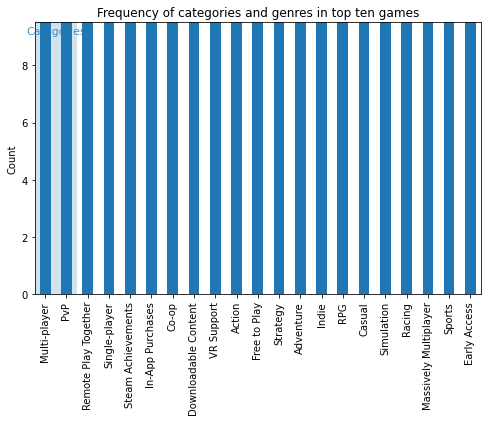

In [308]:
#display_cols = ['name', 'developers', 'publishers', 'genres', 'categories', 'init_price', 'currency']
#top_ten = gamedf.sort_values(by = 'init_price', ascending=False).head(10)

#display(top_ten[display_cols])

# storing category and genre columns in a variable, as we'll be accessing them often
cat_gen_cols = gamedf.columns[-21:]
ax = gamedf[cat_gen_cols].sum().plot.bar(figsize=(8,5))

ax.fill_between([-.5, 1.5], 10, alpha=.2)
ax.text(0.5, 9.1, 'Categories', fontsize=11, color='tab:blue', alpha=.8, horizontalalignment='center')

ax.set_ylim([0, 9.5])
ax.set_ylabel('Count')
ax.set_title('Frequency of categories and genres in top ten games')

plt.show()

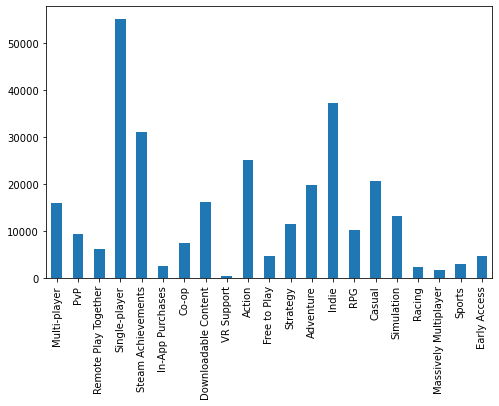

In [309]:
cat_gen_cols = gamedf.columns[-21:]
ax = gamedf[cat_gen_cols].sum().plot.bar(figsize=(8,5))
plt.show()

In [320]:
#pd.options.plotting.backend = "plotly"
#fig, ax = plt.subplots(figsize = (8,5))
fig = gamedf[cat_gen_cols].sum().plot.bar()
fig.show()

In [328]:
cat_cols = ['Multi-player', 'PvP', 'Remote Play Together', 'Single-player', 'Steam Achievements',
            'In-App Purchases', 'Co-op', 'Downloadable Content', 'VR Support']
gen_cols = ['Action', 'Free to Play', 'Strategy', 'Adventure','Indie', 'RPG', 'Casual','Simulation',
                     'Racing', 'Massively Multiplayer', 'Sports', 'Early Access']

In [341]:
top_ten = gamedf.sort_values(by = 'meta_score', ascending=False).head(200)
fig = top_ten[cat_cols].sum().plot.bar()
fig.show()

In [348]:
top_ten = gamedf[gamedf.meta_score > 60].sort_values(by = 'meta_score', ascending=False)
fig = top_ten[cat_cols].sum().sort_values().plot.barh()
fig.show()

In [352]:
top_ten = gamedf[gamedf.meta_score > 70].sort_values(by = 'meta_score', ascending=False)
fig = top_ten[cat_cols].sum().sort_values().plot.barh(title = 'Categories for meta score >70')
fig.show()

In [353]:
top_ten = gamedf[gamedf.meta_score > 70].sort_values(by = 'meta_score', ascending=False)
fig = top_ten[gen_cols].sum().sort_values().plot.barh(title = 'Genres for meta score >70')
fig.show()

In [357]:
gamedf[gamedf.meta_score > 0].meta_score.plot.hist(title = 'Metacritic score distribution')

In [433]:
score_year = gamedf[gamedf.meta_score > 0].groupby('rel_year')['meta_score'].agg('mean')
score_year.plot(kind='bar', title='Avg Meta score per Year')

In [432]:
score_year.describe()

,count,mean,std,min,25%,50%,75%,max
rel_year,,,,,,,,
1997.0,2.0,28.000000,39.597980,0.0,14.00,28.0,42.00,56.0
1998.0,1.0,96.000000,NaN,96.0,96.00,96.0,96.00,96.0
1999.0,2.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
2000.0,2.0,44.000000,62.225397,0.0,22.00,44.0,66.00,88.0
2001.0,4.0,38.000000,44.068129,0.0,0.00,35.5,73.50,81.0
2002.0,1.0,88.000000,NaN,88.0,88.00,88.0,88.00,88.0
2003.0,3.0,26.333333,45.610671,0.0,0.00,0.0,39.50,79.0
2004.0,6.0,57.000000,45.475268,0.0,16.25,76.5,91.75,96.0
2005.0,5.0,64.200000,36.581416,0.0,69.00,80.0,84.00,88.0


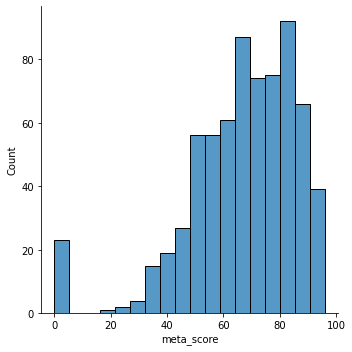

In [424]:
score_year = gamedf.groupby(['meta_score', 'rel_year'])['meta_score'].mean()
sns.displot(score_year)

In [417]:
gamedf.groupby(['rel_year', 'meta_score'])['meta_score'].value_counts()

rel_year  meta_score  meta_score
1997.0    0           0                1
          56          56               1
1998.0    96          96               1
1999.0    0           0                2
2000.0    0           0                1
                                    ... 
2020.0    93          93               2
2021.0    0           0             1340
          68          68               1
          76          76               1
          82          82               3
Name: meta_score, Length: 697, dtype: int64

In [407]:
gamedf.groupby(['meta_score', 'rel_year']).sum()

steam_appid  required_age  is_free  controller_support  \
meta_score rel_year                                                           
0          1997.0         282010             0        0                   0   
           1999.0             70             0        0                   0   
           2000.0             60             0        0                   0   
           2001.0         201000             0        0                   0   
           2003.0         460320             0        0                   0   
...                          ...           ...      ...                 ...   
94         2013.0           8870            17        0                   1   
           2015.0         373420             0        0                   1   
95         2011.0            620             0        0                   1   
96         1998.0             70             0        0                   0   
           2004.0            220             0        0                   1   

                     demos  init_price  final_price  discount_pct  windows  \
meta_score rel_year                                                          
0          1997.0        0       599.0        149.0          75.0        1   
           1999.0        0       798.0        798.0           0.0        2   
           2000.0        0       399.0        399.0           0.0        1   
           2001.0        0      1898.0        998.0          60.0        2   
           2003.0        0      1998.0        748.0         130.0        2   
...                    ...         ...          ...           ...      ...   
94         2013.0        0      1999.0        499.0          75.0        1   
           2015.0        0      3999.0       1399.0          65.0        1   
95         2011.0        0       719.0        719.0           0.0        1   
96         1998.0        0       819.0        819.0           0.0        1   
           2004.0        1       819.0        819.0           0.0        1   

                     mac  linux  achiev_total  Multi-player  PvP  \
meta_score rel_year                                                
0          1997.0      0      0             0             1    0   
           1999.0      2      2             0             2    1   
           2000.0      1      1             0             1    1   
           2001.0      1      1             0             1    1   
           2003.0      1      0             0             1    0   
...                  ...    ...           ...           ...  ...   
94         2013.0      1      1            80             0    0   
           2015.0      1      1            54             1    0   
95         2011.0      1      1            51             1    0   
96         1998.0      1      1             0             1    1   
           2004.0      1      1            33             0    0   

                     Remote Play Together  Single-player  Steam Achievements  \
meta_score rel_year                                                            
0          1997.0                       0              1                   0   
           1999.0                       2              1                   0   
           2000.0                       0              0                   0   
           2001.0                       1              1                   0   
           2003.0                       0              2                   0   
...                                   ...            ...                 ...   
94         2013.0                       1              1                   1   
           2015.0                       1              1                   1   
95         2011.0                       1              1                   1   
96         1998.0                       1              1                   0   
           2004.0                       1              1                   1   

                     In-App Purchases  Co-op  Downlo

In [378]:
i = gamedf[gamedf['rel_date'] == '29 ENE 2008'].index
gamedf.drop(i, inplace=True)

In [381]:
i = gamedf[gamedf['rel_date'] == '8. März 2017'].index
gamedf.drop(i, inplace=True)

In [382]:
gamedf['rel_date'] = pd.to_datetime(gamedf['rel_date'])
gamedf['rel_year'] = gamedf['rel_date'].dt.year

In [393]:
gamedf.reset_index(drop=True, inplace=True)

In [397]:
fig = gamedf['rel_year'].value_counts().plot.bar(title = 'Games Released per year')
fig.show()

In [423]:
gamedf[gamedf.meta_score > 0].meta_score.mean().plot.hist(title = 'Metacritic score distribution')
gamedf['rel_year'].value_counts().plot.hist(title = 'Games Released per year')
fig.show()

ax = df1.plot()

df2.plot(ax=ax)

AttributeError: 'float' object has no attribute 'plot'

In [400]:
#quickly save df
#joblib.dump(gamedf, 'data/gamedf_data_eda')

['data/gamedf_data_eda']

In [401]:
gamedf[gamedf.type == 'dlc'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16115 entries, 28 to 58143
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   type                   16115 non-null  object        
 1   name                   16115 non-null  object        
 2   steam_appid            16115 non-null  int64         
 3   required_age           16115 non-null  int64         
 4   is_free                16115 non-null  int64         
 5   controller_support     16115 non-null  int64         
 6   dlc                    16115 non-null  object        
 7   detailed_description   16115 non-null  object        
 8   about_the_game         16115 non-null  object        
 9   short_description      16115 non-null  object        
 10  supported_languages    16115 non-null  object        
 11  developers             16115 non-null  object        
 12  publishers             16115 non-null  object        
 13  

In [422]:
gamedf[gamedf.rel_date.isnull()]

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,reviews,categories,genres,currency,init_price,final_price,discount_pct,windows,mac,linux,meta_score,achiev_total,rel_date,Multi-player,PvP,Remote Play Together,Single-player,Steam Achievements,In-App Purchases,Co-op,Downloadable Content,VR Support,Action,Free to Play,Strategy,Adventure,Indie,RPG,Casual,Simulation,Racing,Massively Multiplayer,Sports,Early Access,rel_year
239,game,Borderlands Game of the Year,8980,18,0,1,0,"Lock, Load, &amp; Face the MadnessGet ready fo...","Lock, Load, &amp; Face the MadnessGet ready fo...",Get ready for the mind blowing insanity! Play ...,English French Spanish Spain German Italian,[Gearbox Software],[2K],0,0,"Single-player,Multi-player,Co-op,Steam Achieve...","Action,RPG",GBP,2499.0,1674.0,33.0,True,False,False,81,80,NaT,True,False,False,True,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,NaN
301,game,Sherlock Holmes: The Mystery of the Persian Ca...,11180,0,0,0,0,Hunker down at your London flat at 221b Baker ...,Hunker down at your London flat at 221b Baker ...,Scotland Yard has called Sherlock Holmes with ...,English French German Spanish Spain,[Frogwares],[Frogwares],0,0,Single-player,"Adventure,Casual",GBP,699.0,699.0,0.0,True,False,False,0,0,NaT,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,NaN
388,game,1... 2... 3... KICK IT! (Drop That Beat Like a...,15540,0,0,0,0,"Battle your favorite drum 'n' bass track, or r...","Battle your favorite drum 'n' bass track, or r...","Battle your favorite drum 'n' bass track, or r...",English,"[Dejobaan Games, LLC]","[Dejobaan Games, LLC]",0,0,"Single-player,Steam Achievements,Steam Trading...","Action,Indie,Early Access",GBP,699.0,699.0,0.0,True,False,False,0,1,NaT,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,NaN
755,game,The Great Art Race,33580,0,0,0,0,The famous art collection of your family was s...,The famous art collection of your family was s...,The famous art collection of your family was s...,English,[Ascaron Entertainment ltd.],[Assemble Entertainment],0,0,Single-player,"Simulation,Strategy",GBP,399.0,39.0,90.0,True,False,False,0,0,NaT,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,NaN
924,game,SpellForce 2 - Anniversary Edition,39550,0,0,0,[624840],SpellForce 2 - Anniversary Edition presents th...,SpellForce 2 - Anniversary Edition presents th...,SpellForce 2 - Anniversary Edition presents th...,Englishstrongstrong Frenchstrongstrong Germans...,"[Phenomic, THQ Nordic]",[THQ Nordic],0,“Europeans already know this is the best of th...,"Single-player,Multi-player,PvP,Online PvP,Co-o...","RPG,Strategy",GBP,1399.0,349.0,75.0,True,False,False,80,0,NaT,True,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28337,dlc,Shadows: Awakening - Legendary Armory Pack,816140,16,0,1,0,Feature ListAbout the GameThe Legendary Armory...,The Legendary Armory pack contains three might...,The Legendary Armory Pack contains three might...,Englishstrongstrong French Germanstrongstrong ...,[Games Farm s.r.o.],[Kalypso Media Digital],0,0,"Single-player,Downloadable Content,Full contro...","Action,RPG",EUR,199.0,99.0,50.0,True,False,False,0,0,NaT,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,NaN
30482,dlc,HEADLINE CONTENT DLC PACK,863160,0,0,1,0,Complete your iconic F1® car collection in F1®

In [ ]:
gamedf.controller_support.value_counts()

In [ ]:
(gamedf.categories.apply(lambda x: 1 if "Controller Support" in x else 0) == 1).sum()
#only works if its a string, now its a list

In [ ]:
gamedf[gamedf.categories.str.contains('controller support',case=False, regex=False)]

In [ ]:
gamedf[gamedf.categories.str.contains('controller support',case=False, regex=False) & (gamedf.controller_support == 0)]

In [ ]:
gamedf.controller_support = np.where(gamedf.categories.str.contains('controller support',case=False, regex=False) & (gamedf.controller_support == 0), 1, gamedf.controller_support)

In [ ]:
gamedf.controller_support.value_counts()

14347 with 1s adding on the 10269 with controller but 0 = 24616

In [ ]:
gamedf['categories'].explode().unique() 

In [ ]:
gamedf.categories = [x.replace('Partial Controller Support', '').replace('Full controller support', '') for x in gamedf.categories]

In [ ]:
gamedf.categories = gamedf.supported_languages.str.replace('Simplified Chinese', 'Chinese')

In [ ]:
gamedf.categories.str.contains('Partial Controller Support').sum()

In [ ]:
gamedf.categories.str.contains('Full controller support').sum()

In [ ]:
gamedf.categories.str.contains('Controller Support', case=False, regex=False).sum()

In [ ]:
gamedf.info()

In [ ]:
gamedf.loc[gamedf.categories.str.contains('controller support',case=False, regex=False), gamedf.controller_support] = 1

In [ ]:
gamedf[gamedf.categories.str.contains('controller support',case=False, regex=False) & (gamedf.controller_support == 0)]

In [ ]:
gamedf[gamedf.categories.str.contains('controller support',case=False, regex=False)]

In [ ]:
gamedf['categories'.str.contains('controller support')] 

In [ ]:
gamedf[gamedf.categories.str.contains('controller')]

In [ ]:
gamedf.categories.str.contains(pat = 'controller support', case=False).sum()

In [ ]:
gamedf.categories.value_counts()

In [ ]:
filter(lambda x: x not in 'controller support', gamedf.categories)

In [ ]:
gamedf.filter(items=['categories'])

In [ ]:
gamedf.filter(like='ler', axis=0)

In [ ]:
gamedf[gamedf['categories'].isin(['support'])]

In [ ]:
df[df['id'].isin(['foo','bar'])]

In [ ]:
gamedf.loc[gamedf['categories'].isin('Controller Support')]

gamedf[(gamedf.categories.str.contains('Partial Controller Support') & (gamedf.controller_support == 1))].sum()

In [ ]:
type(gamedf.categories[22])

In [ ]:
gamedf.info()